## A Louvain Community Detection Algorithm

This notebook file aims to give out an easy example of using Louvain community detection algorithm in our structural connectivity data. For the Louvain community algorithm, it is a method to extract communities from large networks. The original paper can be found in [here](https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/pdf). One sentence version: this algorithm is evaluating the density of the nodes within a community, then generating classification results.

In [7]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import io
import pandas as pd
plt.style.use('ggplot')


In [2]:
# define the graph
# edge = []
# for i in range(16):
#     for z in range(16):
#         if i != z:
#             edge.append((i,z))

In [10]:
### label information
node_names = {0:'aCNG-L', 1:'aCNG-R',2: 'mCNG-L',3:'mCNG-R',4:'pCNG-L',5:'pCNG-R', 6:'HIP-L',7:'HIP-R',8:'PHG-L',9:'PHG-R',10:'AMY-L',11:'AMY-R', 12:'sTEMp-L',13:'sTEMp-R',14:'mTEMp-L',15:'mTEMp-R'}

### read weight matrix i.e. case 0306A
pth = '/mnt/w/tvb_input/AD/0306A/weights.txt'
openSC = open(pth,"r")
lines = openSC.read()
df = pd.read_csv(io.StringIO(lines), sep='\t', header=None, index_col=None, engine="python")
edge = []

### drop the edge with weights less than 1
for j in range(16):
    for k in range(16):
        if df.iloc[j,k] > 1:
            edge.append((j,k))

        0        1        2        3        4       5       6        7   \
0    0.000  25.6000  22.9000   9.9500   3.9800  0.1420   0.748   0.8760   
1   25.600   0.0000   5.0900  36.9000   0.3590  1.0500   0.238   1.0600   
2   22.900   5.0900   0.0000  53.2000  11.6000  3.0800   1.870   0.5250   
3    9.950  36.9000  53.2000   0.0000   2.4300  3.6800   0.876   0.9150   
4    3.980   0.3590  11.6000   2.4300   0.0000  1.8700   0.820   0.4540   
5    0.142   1.0500   3.0800   3.6800   1.8700  0.0000   0.266   0.2460   
6    0.748   0.2380   1.8700   0.8760   0.8200  0.2660   0.000   2.0100   
7    0.876   1.0600   0.5250   0.9150   0.4540  0.2460   2.010   0.0000   
8    0.700   0.0550   0.3460   0.1270   0.8010  0.1130  24.800   0.1220   
9    0.382   0.8320   0.6220   1.5000   0.2810  0.4720   0.877  46.8000   
10   0.204   0.0111   0.1010   0.0207   0.0507  0.0000  25.100   0.0349   
11   0.307   0.1030   0.0248   0.1200   0.0521  0.0591   0.370  18.0000   
12   1.690   0.5500   0.3

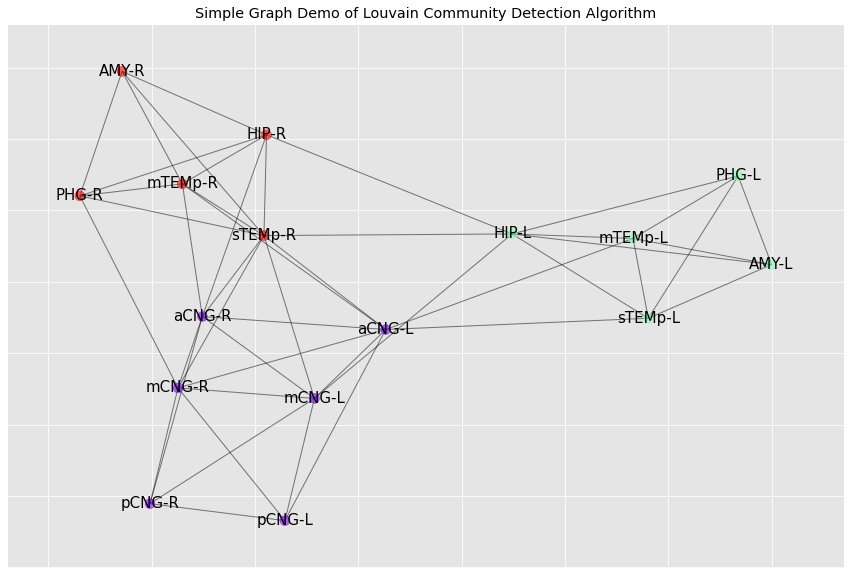

In [9]:
### create edge network
G = nx.Graph()
G.add_edges_from(edge)

### retrun partition as a dict
partition = community_louvain.best_partition(G)

### visualization
plt.figure(figsize=(15,10))
plt.title("Simple Graph Demo of Louvain Community Detection Algorithm")
pos = nx.spring_layout(G)
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()), alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, node_names, font_size=15, font_color="black")
plt.show()